In [2]:
import os
import sys
from pathlib import Path
# Setting the working directory to the root of the project
project_dir = Path("C:/Users/adbou/source/repos/KFHXRelatedAi/")
os.chdir(project_dir)

from Configs.GeneralPaths import SOURCEDATA
import pandas as pd

In [3]:
#loading the csv into pandas df
deals_path = SOURCEDATA / "All-Redemptions.xlsx"
trxs = pd.read_excel(deals_path)



Exploration

In [4]:
trxs.head()

,TrxId,TrxDate,FK_BusinessUserId,Reference,EntityId,PointsRewarded,PointsRedeemed,FK_StatusId,EntityName,FK_TenantId,TransactionType,FK_ContentId,CouponStatus,EntityCategory
0,12429817,2023-06-04 11:46:06.050,976480,Deal Redemption,1798,NaN,1000,9,Alkhalid Clinic,2,redeem,113923.0,103.0,Health & Beauty
1,12429824,2023-06-04 11:58:56.140,976480,Transfer Points,1454,NaN,1000,9,Tam Rewards,2,redeem,NaN,NaN,NaN
2,12525687,2023-06-07 14:08:10.287,976480,Deal Redemption,1638,NaN,10000,9,H&S Store,2,redeem,113853.0,103.0,Electronics
3,12525666,2023-06-08 11:03:32.043,976480,Deal Redemption,1638,NaN,10000,9,H&S Store,2,redeem,113853.0,106.0,Electronics
4,12820067,2023-06-21 08:08:20.800,976677,Create Voucher,1525,NaN,1000,9,Al Oula petrol station,2,redeem,NaN,104.0,NaN


In [5]:
trxs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73493 entries, 0 to 73492
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   TrxId              73493 non-null  int64         
 1   TrxDate            73493 non-null  datetime64[ns]
 2   FK_BusinessUserId  73493 non-null  int64         
 3   Reference          73493 non-null  object        
 4   EntityId           73493 non-null  int64         
 5   PointsRewarded     22 non-null     float64       
 6   PointsRedeemed     73493 non-null  int64         
 7   FK_StatusId        73493 non-null  int64         
 8   EntityName         73493 non-null  object        
 9   FK_TenantId        73493 non-null  int64         
 10  TransactionType    73493 non-null  object        
 11  FK_ContentId       37951 non-null  float64       
 12  CouponStatus       37959 non-null  float64       
 13  EntityCategory     17998 non-null  object        
dtypes: dat

In [6]:
trxs.describe()

,TrxId,TrxDate,FK_BusinessUserId,EntityId,PointsRewarded,PointsRedeemed,FK_StatusId,FK_TenantId,FK_ContentId,CouponStatus
count,7.349300e+04,73493,7.349300e+04,73493.000000,22.0,73493.000000,73493.0,73493.0,37951.000000,37959.000000
mean,2.008011e+07,2024-03-07 05:17:47.955130624,1.035584e+06,1523.176112,0.0,9955.492727,9.0,2.0,114567.808490,103.372560
min,1.242982e+07,2023-06-04 11:46:06.050000,9.764800e+05,1454.000000,0.0,1.000000,9.0,2.0,113816.000000,103.000000
25%,1.849386e+07,2024-01-28 23:20:17.460000,1.005923e+06,1454.000000,0.0,3500.000000,9.0,2.0,113851.000000,103.000000
50%,2.081330e+07,2024-04-04 01:04:59.912999936,1.030553e+06,1498.000000,0.0,5000.000000,9.0,2.0,115099.000000,103.000000
75%,2.116591e+07,2024-04-08 11:49:34.883000064,1.061997e+06,1527.000000,0.0,11000.000000,9.0,2.0,115099.000000,104.000000
max,2.517390e+07,2024-06-28 10:51:19.410000,1.120413e+06,1836.000000,0.0,115000.000000,9.0,2.0,115259.000000,119.000000
std,2.055559e+06,NaN,3.403345e+04,102.933078,0.0,11077.222687,0.0,0.0,626.025033,0.496875


In [7]:
trxs.isnull().sum()

TrxId                    0
TrxDate                  0
FK_BusinessUserId        0
Reference                0
EntityId                 0
PointsRewarded       73471
PointsRedeemed           0
FK_StatusId              0
EntityName               0
FK_TenantId              0
TransactionType          0
FK_ContentId         35542
CouponStatus         35534
EntityCategory       55495
dtype: int64

For Redemption Analysis

In [8]:
redeemTrxs = trxs.drop(columns=['PointsRewarded','CouponStatus','FK_TenantId'])

In [9]:
redeemTrxs.head()

,TrxId,TrxDate,FK_BusinessUserId,Reference,EntityId,PointsRedeemed,FK_StatusId,EntityName,TransactionType,FK_ContentId,EntityCategory
0,12429817,2023-06-04 11:46:06.050,976480,Deal Redemption,1798,1000,9,Alkhalid Clinic,redeem,113923.0,Health & Beauty
1,12429824,2023-06-04 11:58:56.140,976480,Transfer Points,1454,1000,9,Tam Rewards,redeem,NaN,NaN
2,12525687,2023-06-07 14:08:10.287,976480,Deal Redemption,1638,10000,9,H&S Store,redeem,113853.0,Electronics
3,12525666,2023-06-08 11:03:32.043,976480,Deal Redemption,1638,10000,9,H&S Store,redeem,113853.0,Electronics
4,12820067,2023-06-21 08:08:20.800,976677,Create Voucher,1525,1000,9,Al Oula petrol station,redeem,NaN,NaN


In [10]:
#plotting the number of transactions with reference Deal Redemption
deal_redemption_data = redeemTrxs[redeemTrxs['Reference'] == 'Deal Redemption']


In [11]:
deal_redemption_data

,TrxId,TrxDate,FK_BusinessUserId,Reference,EntityId,PointsRedeemed,FK_StatusId,EntityName,TransactionType,FK_ContentId,EntityCategory
0,12429817,2023-06-04 11:46:06.050,976480,Deal Redemption,1798,1000,9,Alkhalid Clinic,redeem,113923.0,Health & Beauty
2,12525687,2023-06-07 14:08:10.287,976480,Deal Redemption,1638,10000,9,H&S Store,redeem,113853.0,Electronics
3,12525666,2023-06-08 11:03:32.043,976480,Deal Redemption,1638,10000,9,H&S Store,redeem,113853.0,Electronics
5,12838074,2023-06-22 08:28:30.300,976921,Deal Redemption,1750,10,9,Deliveroo Plus,redeem,113851.0,Food & Beverage
9,13587992,2023-07-27 14:41:13.607,976480,Deal Redemption,1563,50,9,Mawqif App,redeem,113835.0,On-demand
...,...,...,...,...,...,...,...,...,...,...,...
73485,25173757,2024-06-28 02:37:27.123,1048474,Deal Redemption,1525,5000,9,Al Oula petrol station,redeem,115099.0,NaN
73486,25173781,2024-06-28 03:37:12.100,1056928,Deal Redemption,1828,6000,9,E Net,redeem,115217.0,e-commerce
73487,25173787,2024-06-28 04:39:47.583,1075249,Deal Redemption,1828,3500,9,E Net,redeem,115231.0,e-commerce
73488,25173790,2024-06-28 04:56:03.677,1110587,Deal Redemption,1828,6000,9,E Net,redeem,115217.0,e-commerce


Get the top redeemed deals

In [12]:
top_deals = deal_redemption_data.groupby('FK_ContentId')['PointsRedeemed'].sum().reset_index()

top_deals = top_deals.sort_values(by='PointsRedeemed', ascending=False).head(10)



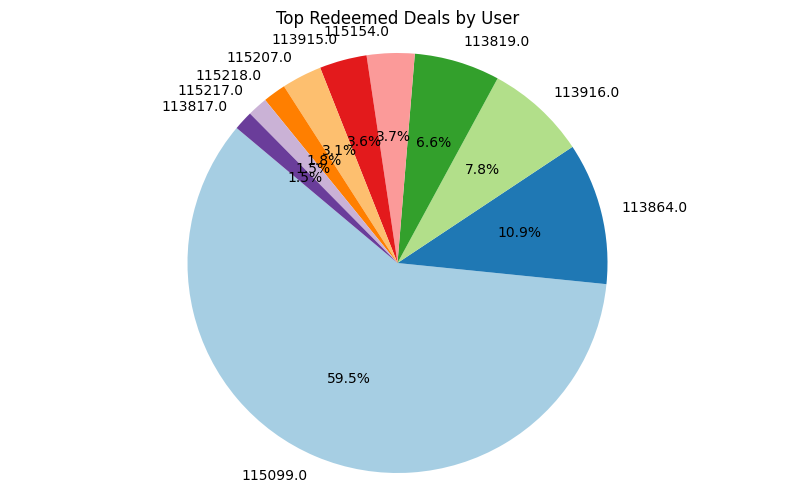

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.pie(top_deals['PointsRedeemed'], labels=top_deals['FK_ContentId'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Top Redeemed Deals by User')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()